# **``SOLUTION`` - Data Visualization Exercise**



Data source: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### **Nomor 1** : Histogram

Buatlah Histogram untuk menampilkan distribusi data harga rumah (kolom “Price”)!

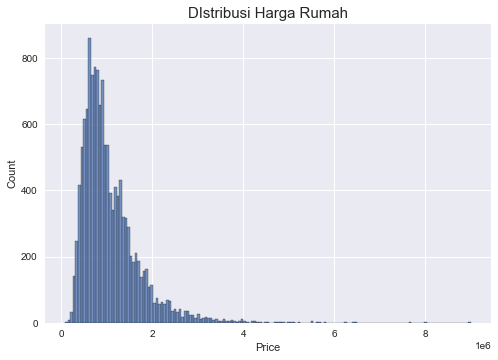

In [3]:
plt.style.use('seaborn')
sns.histplot(df['Price'])
plt.title('DIstribusi Harga Rumah', size = 15)
plt.show()

<hr>

### **Nomor 2** : Box Plot

Buatlah Box Plot untuk menampilkan distribusi data jarak ke CBD (kolom “Distance”)!
Buatlah Box Plot “Distance” untuk tiap nama region (kolom “Regionname”)!

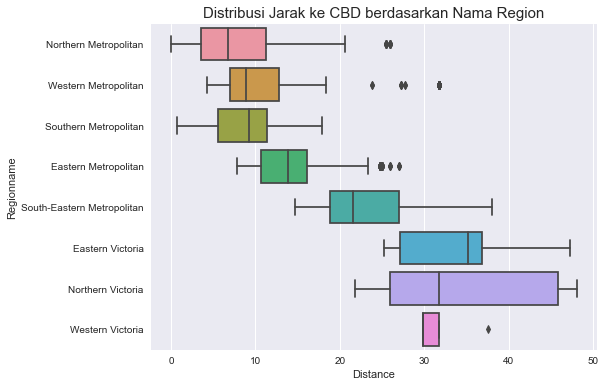

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['Distance'], y=df['Regionname'])
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', size = 15)
plt.show()

<hr>

### **Nomor 3** : Bar Plot

Buatlah Bar Plot (diagram batang) untuk membandingkan nilai median harga rumah (kolom “Price”) di tiap tipe rumah (kolom “Type”)!

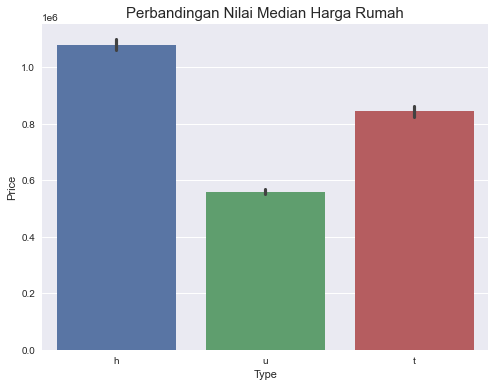

In [5]:
plt.figure(figsize=(8,6))
sns.barplot(x='Type', y='Price', data=df, estimator=np.median)
plt.title('Perbandingan Nilai Median Harga Rumah', size=15)
plt.show()

<hr>

### **Nomor 4** : Scatter Plot

Buatlah Scatter Plot (diagram titik) untuk menampilkan korelasi antara harga rumah (kolom “Price”) dengan Jarak ke CBD (kolom “Distance”)!
Bedakan warna titik berdasarkan tipe rumah (kolom “Type”)!


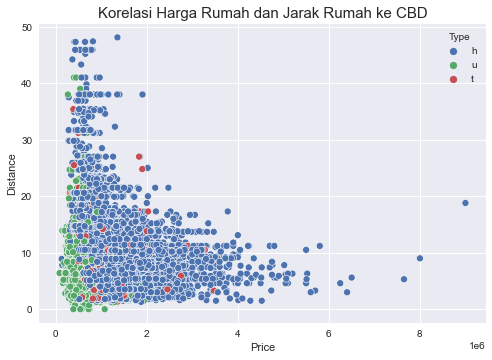

In [6]:
sns.scatterplot(data=df, x='Price', y='Distance', hue='Type')
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', size=15)
plt.show()

<hr>

### **Nomor 5** : Line Plot

* Konversi kolom “Date” menjadi tipe data datetime64. Buatlah kolom baru bernama ‘Month’ hasil ekstraksi data bulan dari kolom “Date”!
* Buatlah Line Plot (diagram garis) untuk menampilkan tren perkembangan harga rumah (kolom “Price”) tiap bulan!
* Bedakan warna garis berdasarkan tipe rumah (kolom “Type”)!


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month

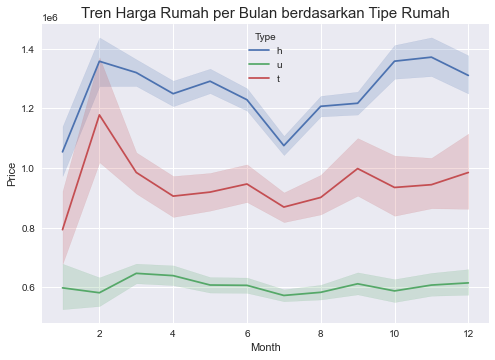

In [8]:
sns.lineplot(data=df, x='Month', y='Price', hue='Type')
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah', size=15)
plt.show()

<hr>

### **Nomor 6** : Pie Chart

* Kelompokkan total luas tanah (kolom “Landsize”) berdasarkan region (kolom “Regionname”), lalu simpan ke dalam sebuah DataFrame baru!
* Dari DataFrame baru tersebut, buatlah Pie Chart (diagram lingkaran) untuk menampilkan proporsi total luas tanah di tiap region!
* Tambahkan explode agar potongan diagram seakan terpisah!


In [9]:
df_LR = df[['Landsize']].groupby(df['Regionname']).sum()
df_LR

,Landsize
Regionname,
Eastern Metropolitan,932811.0
Eastern Victoria,156334.0
Northern Metropolitan,2213208.0
Northern Victoria,137574.0
South-Eastern Metropolitan,276296.0
Southern Metropolitan,2390939.0
Western Metropolitan,1455153.0
Western Victoria,20976.0


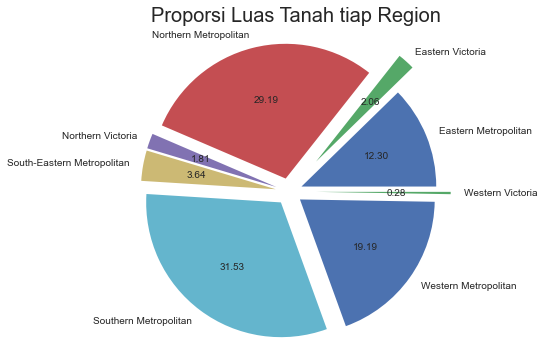

In [10]:
plt.figure(figsize=(8,6))
plt.pie(x=df_LR['Landsize'],
        labels = df_LR.index.tolist(),
        autopct = '%.2f',
        explode = (0.1, 0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
       )
plt.axis('equal')
plt.title('Proporsi Luas Tanah tiap Region', size=20)
plt.show()

<hr>

### **Nomor 7** : Correlation Heatmap

* Buatlah terlebih dahulu correlation matrix yang berisi korelasi kolom “Price”, “Distance”, “Landsize”, dan “Rooms”!
* Dari correlation matrix ini, buatlah Correlation Heatmap untuk memvisualisasikan korelasi antar variabel!
* Tampilkan data korelasi di heatmap (annot = True) !


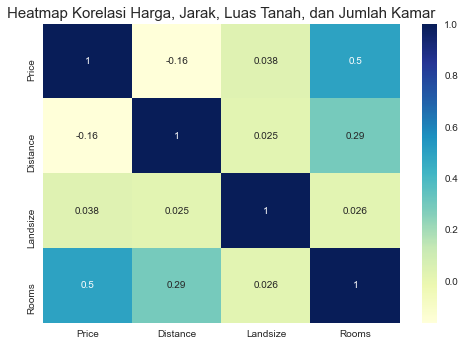

In [11]:
df_corr = df[['Price', 'Distance', 'Landsize', 'Rooms']].corr()

sns.heatmap(df_corr, annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah, dan Jumlah Kamar', size=15)
plt.show()

<hr>

### **Nomor 8** : Geographic Plot using Folium

* Urutkan data berdasarkan harga (kolom “Price”) dan tampilkan 10 data dari harga rumah tertinggi, kemudian simpan hasilnya ke dalam DataFrame baru!
* Buatlah peta Melbourne yang berlokasi di [-37.8136, 144.9631] dan zoom_start = 11!
* Di dalam peta Melbourne, tambahkan 10 marker sesuai lokasi 10 rumah dengan harga tertinggi!
* Di dalam marker, popup berisi harga rumah dan tooltip berisi alamat rumah.

In [12]:
df_topten = df.sort_values(by=['Price'], ascending=False).reset_index(drop = True).head(10)
df_topten

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
1,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,5
2,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,8
4,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0,9
5,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,2016-10-15,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,10
6,Brighton,161 Church St,5,h,5800000.0,PI,Castran,2017-08-04,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,8
7,South Yarra,18 Avoca St,4,h,5700000.0,S,Castran,2016-12-11,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,12
8,Middle Park,204 Page St,6,h,5600000.0,PI,Marshall,2017-03-06,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0,3
9,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,2016-09-17,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9


In [13]:
melb_map = folium.Map(location = [-37.8136, 144.9631], zoom_start=11)

for i in range(len(df_topten['Lattitude'])):
    folium.Marker(df_topten[['Lattitude', 'Longtitude']].loc[i].tolist(),
                  popup = 'Price: AUD ' + str(round(df_topten['Price'].loc[i]/1000000, 1)) + 'M',
                  tooltip = df_topten['Address'].loc[i],
                  icon = folium.Icon(color='red', icon='info-sign')
                 ).add_to(melb_map)

melb_map